In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set the max_columns option to None to display all columns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel('/Users/natebender/Documents/ArcGIS/Projects/Western_protected_lands/geodf_growthrate_WGS84_SummarizeWithin_TableToExcel.xlsx')


In [3]:
df.head()

,OBJECTID,region,division,state,county,stname,ctyname,geofips,yr_2001,yr_2002,yr_2003,yr_2004,yr_2005,yr_2006,yr_2007,yr_2008,yr_2009,yr_2010,yr_2011,yr_2012,yr_2013,yr_2014,yr_2015,yr_2016,yr_2017,yr_2018,yr_2019,yr_2020,yr_2021,descriptio,linecode,avg_gr_5y,avg_gr_10y,avg_gr_20y,Shape_Length,Shape_Area,protected_overlap_area,Count of Polygons,protected_ratio
0,1,4,8,4,1,Arizona,Apache County,4001,0,0.027246,0.020066,0.030087,0.030314,0.020613,0.068930,-0.005125,-0.011229,-0.027159,-0.011921,-0.012065,-0.022241,0.003471,0.012141,-0.009875,0.001843,0.000972,-0.011801,0.059831,0.006599,ann_growthrate,40,0.011489,0.002888,0.008535,1.216737e+06,4.384223e+10,2.226718e+08,11,0.005079
1,2,4,8,4,3,Arizona,Cochise County,4003,0,-0.011890,0.027794,0.000598,0.017390,0.005264,0.020469,-0.020966,-0.019845,-0.016014,-0.017262,-0.014872,-0.013858,0.001048,-0.002811,-0.005579,0.004453,-0.007618,0.000961,0.032896,-0.007004,ann_growthrate,40,0.004737,-0.001238,-0.001342,6.021976e+05,2.239661e+10,1.567446e+09,33,0.069986
2,3,4,8,4,5,Arizona,Coconino County,4005,0,-0.012257,0.008440,0.029018,0.012522,0.013230,0.020194,-0.017207,-0.046738,-0.005520,0.010366,0.000331,0.021091,0.012213,0.011803,0.007594,0.013706,-0.004689,-0.016379,-0.067329,0.050473,ann_growthrate,40,-0.004844,0.002881,0.002043,1.566054e+06,7.371795e+10,8.250666e+09,61,0.111922
3,4,4,8,4,7,Arizona,Gila County,4007,0,-0.011282,0.003376,0.003725,0.019656,0.019350,0.012356,-0.008397,-0.041268,-0.010899,0.000756,0.020642,0.021546,0.001919,-0.008646,-0.020023,0.000308,-0.006786,-0.014608,-0.000524,0.017197,ann_growthrate,40,-0.000883,0.001102,-0.000080,1.032961e+06,1.803345e+10,1.354350e+09,28,0.075102
4,5,4,8,4,9,Arizona,Graham County,4009,0,-0.012123,0.014624,0.019191,0.027058,0.045733,0.031809,-0.001485,-0.091619,-0.005456,0.024597,0.027732,-0.009170,-0.015914,0.030421,0.000846,0.016518,0.012417,-0.006463,0.042387,0.010507,ann_growthrate,40,0.015073,0.010928,0.008080,6.676183e+05,1.710828e+10,1.572072e+09,25,0.091890


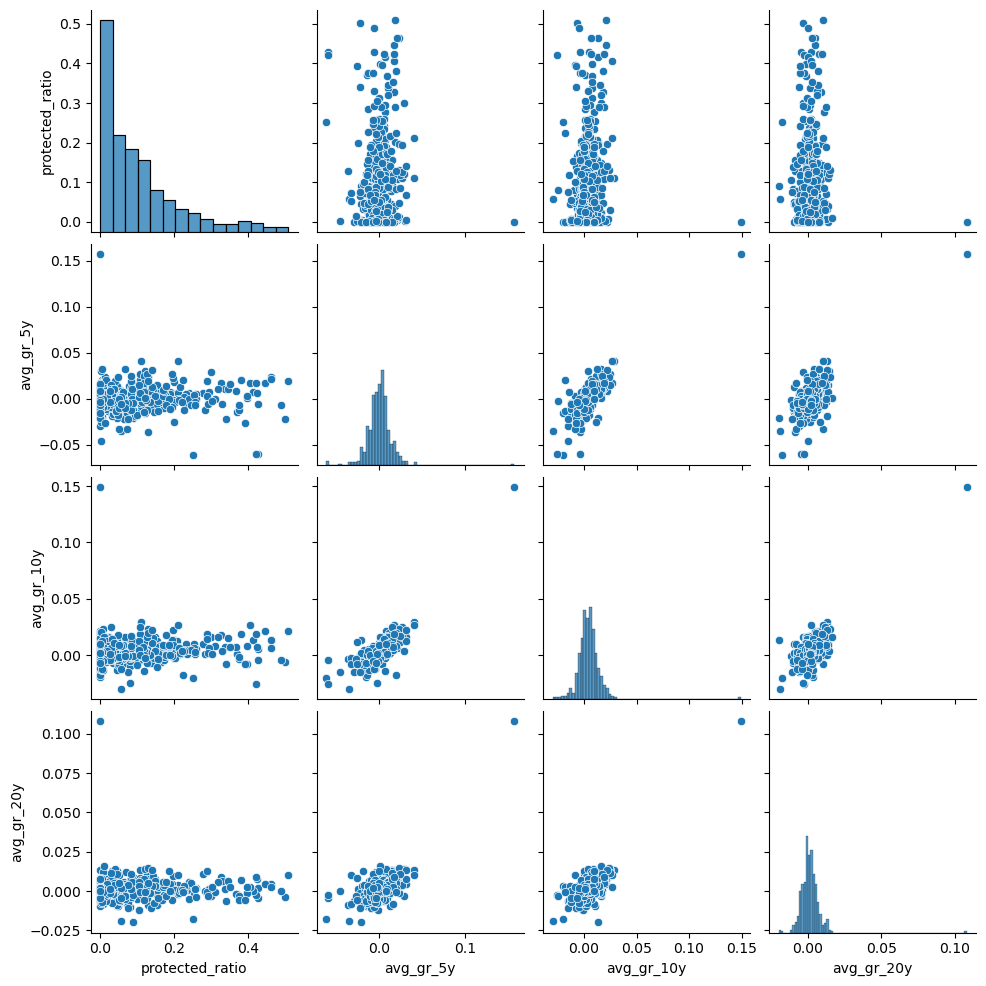

Correlation with avg_gr_5y: 0.0216015592622159
Correlation with avg_gr_10y: 0.05732587637375164
Correlation with avg_gr_20y: 0.0117692406790924


In [4]:
sns.pairplot(df, vars=["protected_ratio", "avg_gr_5y", "avg_gr_10y", "avg_gr_20y"])
plt.show()

# Calculate Pearson correlation coefficients
correlation_5y = df["protected_ratio"].corr(df["avg_gr_5y"])
correlation_10y = df["protected_ratio"].corr(df["avg_gr_10y"])
correlation_20y = df["protected_ratio"].corr(df["avg_gr_20y"])

print("Correlation with avg_gr_5y:", correlation_5y)
print("Correlation with avg_gr_10y:", correlation_10y)
print("Correlation with avg_gr_20y:", correlation_20y)

In [5]:
import statsmodels.api as sm

# Create a linear regression model for "protected_ratio" and "avg_gr_5y"
X = df[["avg_gr_20y"]]
X = sm.add_constant(X)  # Add a constant term
y = df["protected_ratio"]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        protected_ratio   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.05708
Date:                Wed, 18 Oct 2023   Prob (F-statistic):              0.811
Time:                        15:49:13   Log-Likelihood:                 324.79
No. Observations:                 414   AIC:                            -645.6
Df Residuals:                     412   BIC:                            -637.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1027      0.006     18.626      0.0

/Users/natebender/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


/Users/natebender/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


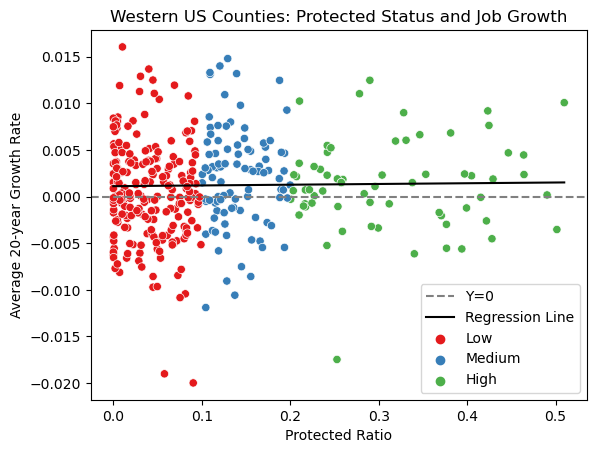

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Create a new column to categorize the counties into groups
df['group'] = pd.cut(df['protected_ratio'], bins=[0, 0.10, 0.20, 1.0], labels=["Low", "Medium", "High"])

# Create a scatterplot
sns.scatterplot(data=df, x="protected_ratio", y="avg_gr_20y", hue="group", palette="Set1")

# Set labels and a legend
plt.title("Western US Counties: Protected Status and Job Growth")
plt.xlabel("Protected Ratio")
plt.ylabel("Average 20-year Growth Rate")
plt.legend(title="Ratio")

# Create a linear regression model
X = df[["protected_ratio"]]
X = sm.add_constant(X)
y = df["avg_gr_20y"]
model = sm.OLS(y, X).fit()

# Calculate the regression line
slope, intercept = model.params["protected_ratio"], model.params["const"]
x_values = np.linspace(df["protected_ratio"].min(), df["protected_ratio"].max())
y_values = slope * x_values + intercept

# Add a horizontal line at y=0
plt.axhline(0, color="grey", linestyle="--", label="Y=0")

# Plot the regression line
plt.plot(x_values, y_values, color="black", label="Regression Line")

# Show the plot
plt.legend()
plt.show()


### Job Growth Rate by Broad Groups

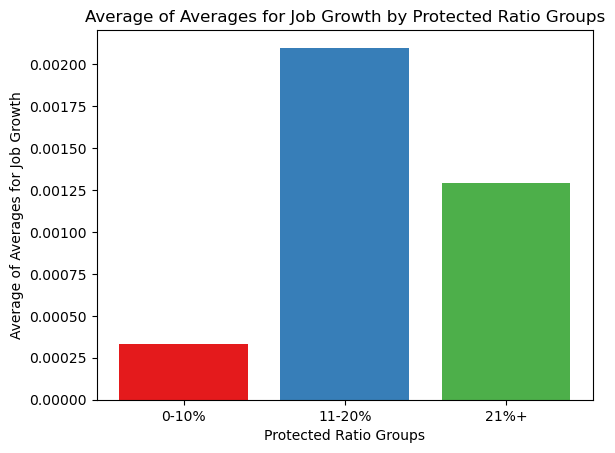

In [7]:
# Create a new column to categorize the counties into groups
df['group'] = pd.cut(df['protected_ratio'], bins=[0, .10, 0.20, 1.0], labels=["0-10%", "11-20%", "21%+"])

# Calculate the average-of-averages for each group
group_avg_of_avgs = df.groupby('group').agg({'avg_gr_20y': 'mean'})

# Define the color palette
colors = sns.color_palette("Set1", n_colors=len(group_avg_of_avgs))

# Create the histogram
plt.bar(group_avg_of_avgs.index, group_avg_of_avgs['avg_gr_20y'], color=colors)

# Set labels and a title
plt.title("Average of Averages for Job Growth by Protected Ratio Groups")
plt.xlabel("Protected Ratio Groups")
plt.ylabel("Average of Averages for Job Growth")

# Show the plot
plt.show()

In [17]:
def calculate_multiple(group1_avg, group2_avg):
    if group2_avg == 0:
        return "Undefined"
    return group1_avg / group2_avg

"0-10%", "11-20%", "21%+"

# Example usage:
low_group_avg = df[df['group'] == "0-10%"]['avg_gr_20y'].mean()
medium_group_avg = df[df['group'] == "11-20%"]['avg_gr_20y'].mean()
high_group_avg = df[df['group'] == "21%+"]['avg_gr_20y'].mean()

high_vs_med = calculate_multiple(high_group_avg, medium_group_avg)
high_vs_low = calculate_multiple(high_group_avg, low_group_avg)
med_vs_low = calculate_multiple(medium_group_avg, low_group_avg)
med_vs_high = calculate_multiple(medium_group_avg, high_group_avg)

print(f"The Medium group's average job growth rate is {med_vs_high:.2f} times as large as the High group.")
print(f"The High group's average job growth rate is {high_vs_low:.2f} times as large as the Low group.")
print(f"The Med group's average job growth rate is {med_vs_low:.2f} times as large as the Low group.")


The Medium group's average job growth rate is 1.62 times as large as the High group.
The High group's average job growth rate is 3.91 times as large as the Low group.
The Med group's average job growth rate is 6.36 times as large as the Low group.


In [18]:
group_avg_of_avgs

,avg_gr_20y
group,
0-10%,0.000330
11-20%,0.002097
21%+,0.001291
